### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.


In [1]:
#import the needed libraries
import numpy as np   
from scipy.stats import iqr
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
vehdf = pd.read_csv("vehicle.csv", header = 0)

In [3]:
#check the data
vehdf.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [4]:
vehdf.isnull().sum() #check for null values

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
vehdf.shape #check the shape

(846, 19)

In [6]:
vehdf = vehdf.dropna() #drop the na values

In [7]:
vehdf.shape #check the shape after dropping

(813, 19)

In [8]:
vehdf.info() #check for any other information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [9]:
vehdf.describe() #check for any other issue possible

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

The Class Column contains below values
 car    413
bus    205
van    195
Name: class, dtype: int64


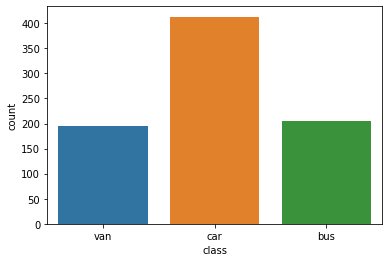

In [10]:
#plot the categorical variable
print("The Class Column contains below values\n", vehdf["class"].value_counts())
ax = sns.countplot(x="class", data=vehdf)

In [11]:
column = vehdf.columns
column = list(column).remove("class")

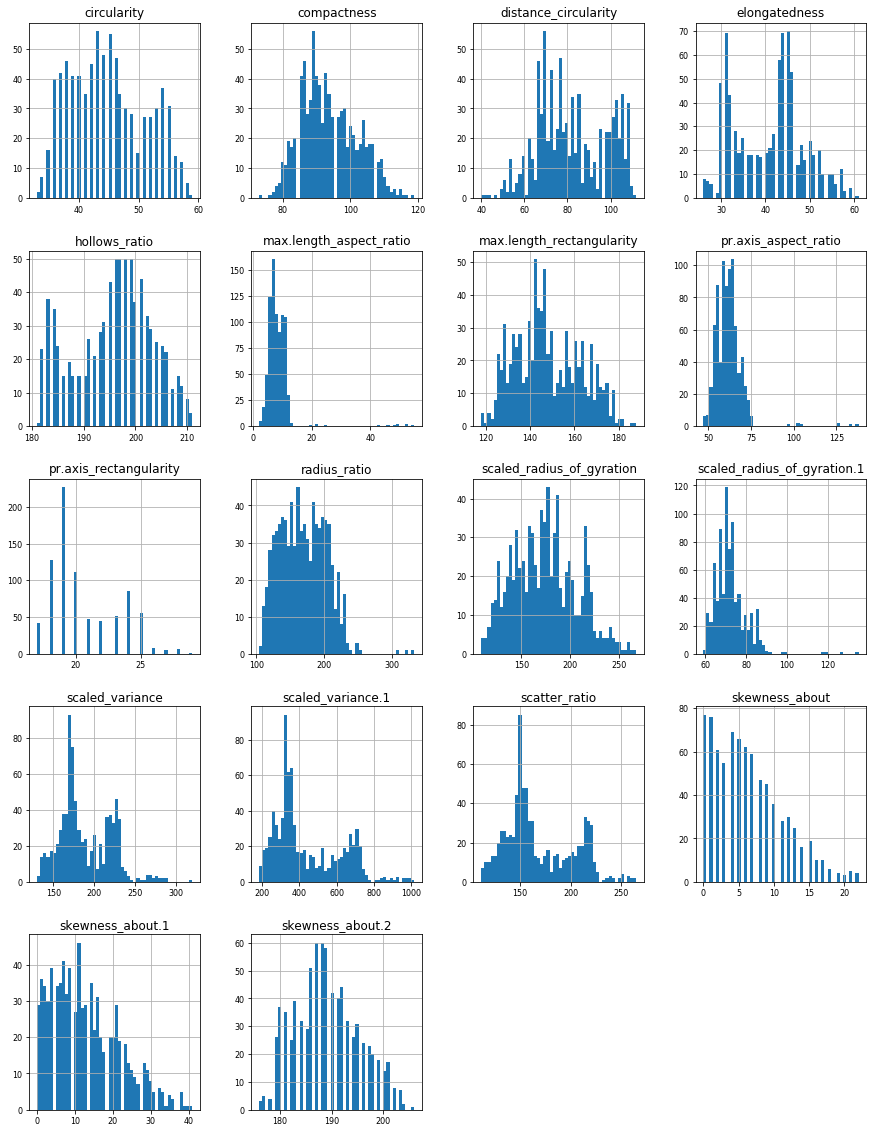

In [12]:
# Plot the distribution for each variable
vehdf.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

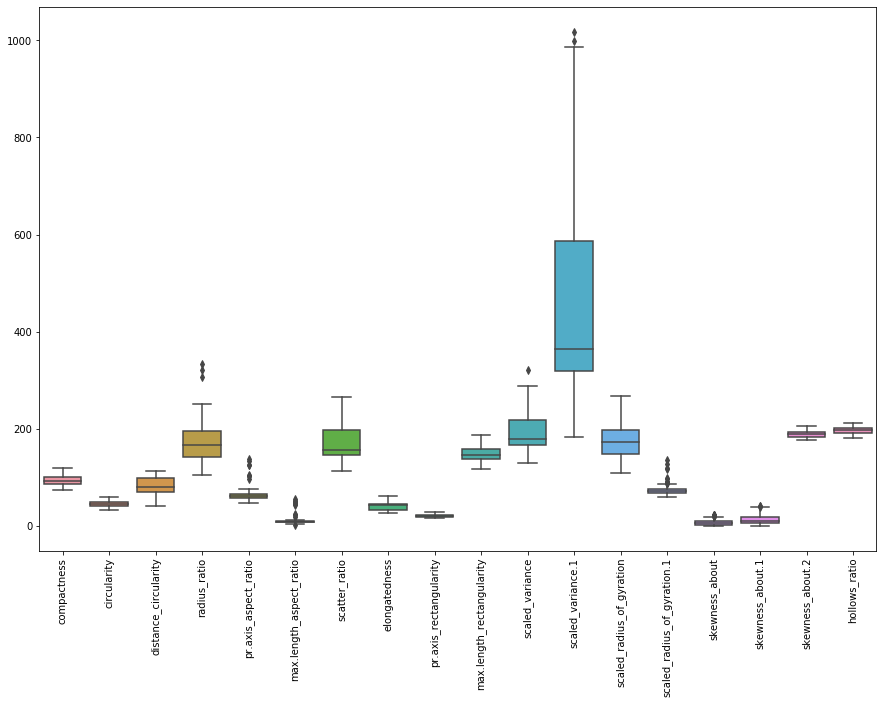

In [13]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=vehdf, whis = 1.5)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() 

#### We see few outliers in the data hence we will have to get a hold on them.

In [14]:
Q1 = vehdf.quantile(0.25)
Q3 = vehdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.0
circularity                      9.0
distance_circularity            28.0
radius_ratio                    54.0
pr.axis_aspect_ratio             8.0
max.length_aspect_ratio          3.0
scatter_ratio                   52.0
elongatedness                   13.0
pr.axis_rectangularity           4.0
max.length_rectangularity       22.0
scaled_variance                 50.0
scaled_variance.1              268.0
scaled_radius_of_gyration       49.0
scaled_radius_of_gyration.1      8.0
skewness_about                   7.0
skewness_about.1                13.0
skewness_about.2                 9.0
hollows_ratio                   10.0
dtype: float64


In [15]:
cleandf = vehdf[~((vehdf < (Q1 - 1.5 * IQR)) |(vehdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(778, 19)

### One of the method to treat outliers is to remove them. Generally we avoid this as it can lead to data loss, in case of large data sets with large no of outliers. Hence we will not use above dataset and impute outliers with median.

In [16]:
for col in vehdf.columns[:-1]:
    q1 = vehdf[col].quantile(0.25)
    q3 = vehdf[col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehdf.loc[(vehdf[col] < low) | (vehdf[col] > high), col] = vehdf[col].median()

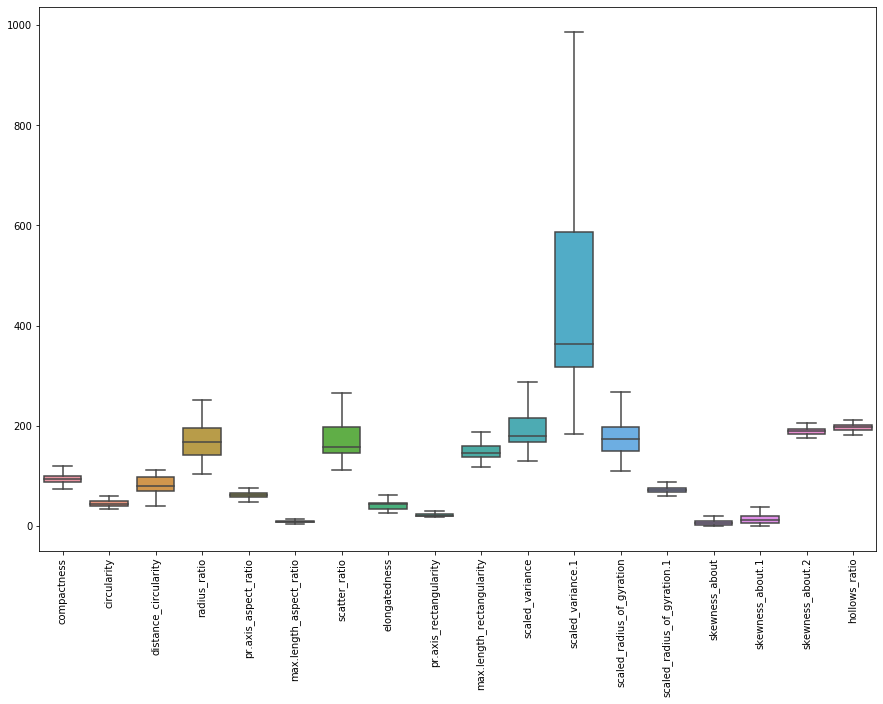

In [17]:
#view the boxplot
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=vehdf, whis = 1.5)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() 

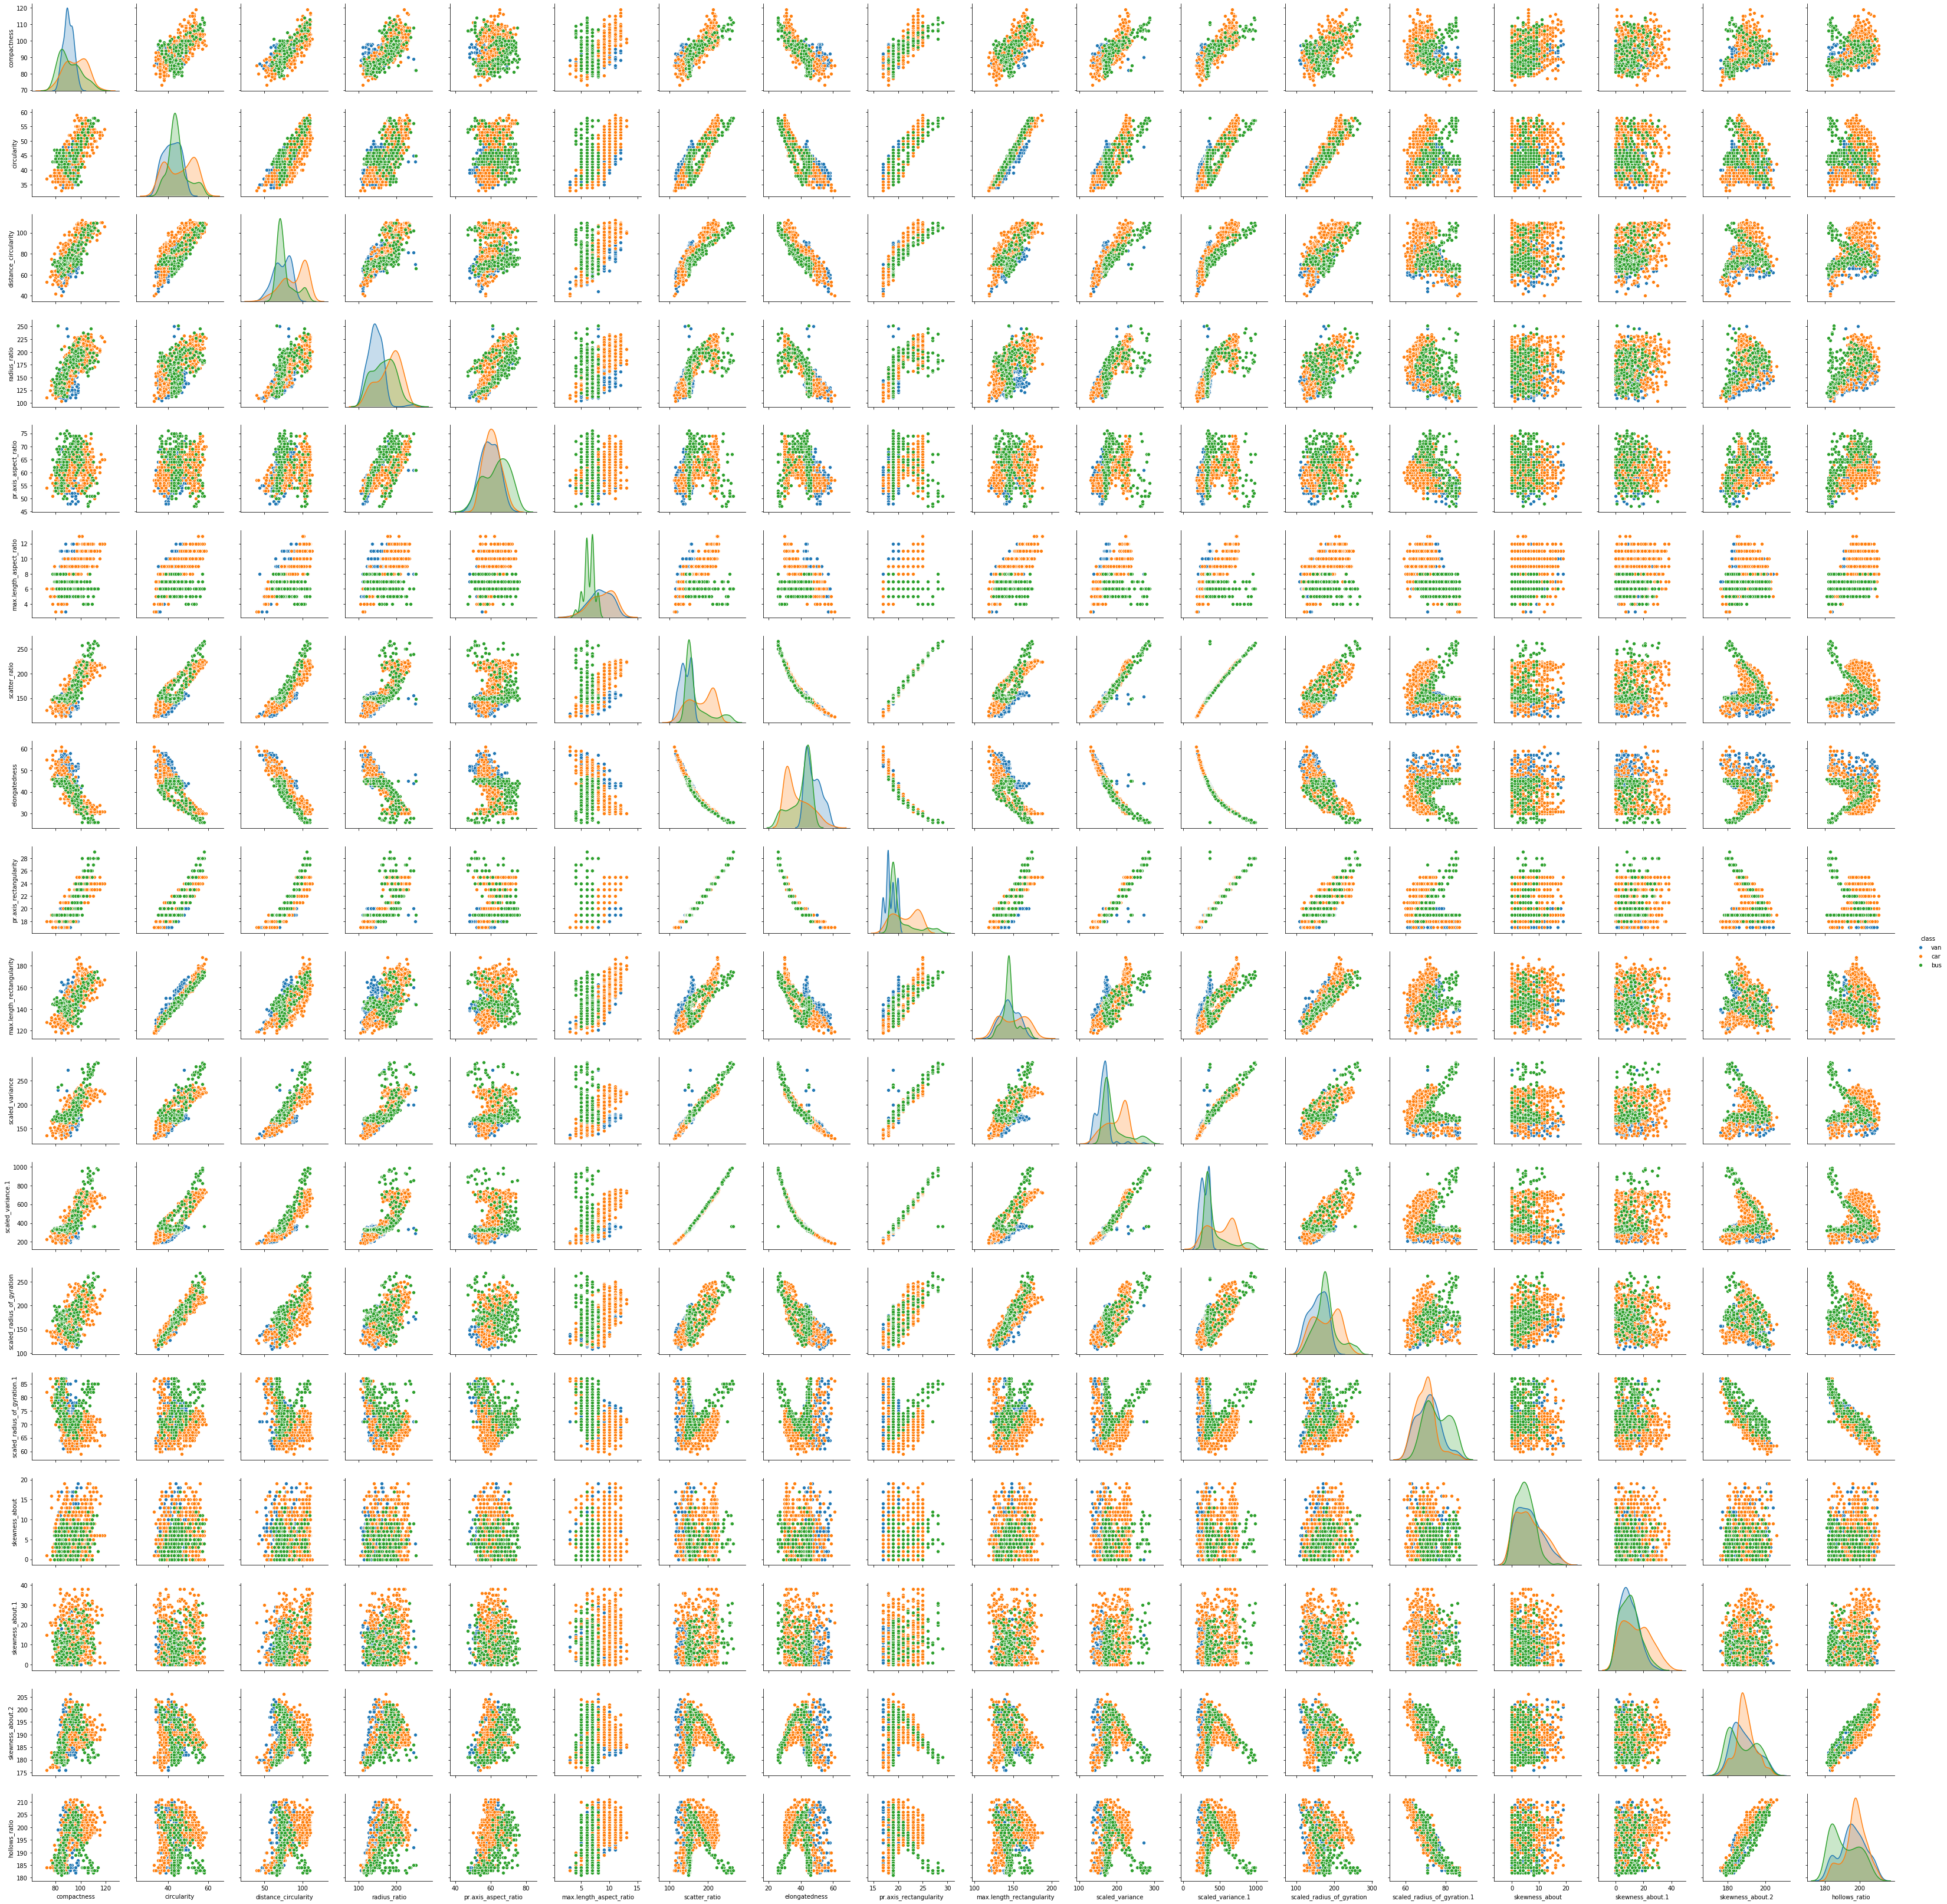

In [18]:
sns_plot = sns.pairplot(vehdf,hue="class",diag_kind="kde",size=2.5)

Looking at the pairplot we can say there are many variables with high correlation amongst them. To confirm we plot correlation matrix.

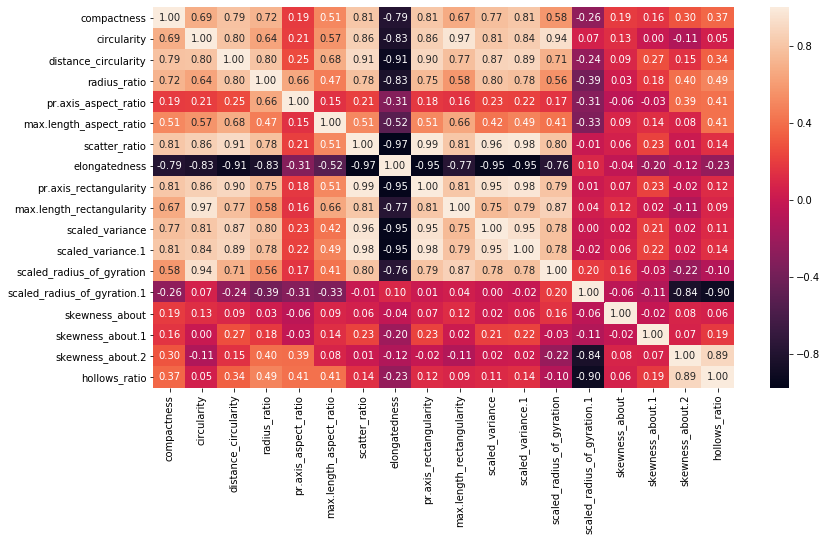

In [19]:
#plot the corelation Matrix
corr= vehdf.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr, annot=True, fmt='.2f')

From above correlation matrix we can see that there are many features which are highly correlated. Many features are having more than 0.8 correlation. We can decide to get rid of those columns whose correlation is +-0.8 or above. The easiest way is to delete or eliminate one of the perfectly correlated features. We can pick one of the two highly correalated variables and drop another one, e.g. in this case scaled_variance & scaled_variance.1 are having strong positive correlation, we can pick one and drop the other.

Another way is we can use a dimensionality reduction algorithm - Principle Component Analysis (PCA).

In [20]:
#separate the target variable 
X =  vehdf.drop("class", axis=1)
y =  vehdf["class"]

In [21]:
#Scale the Independent variables
X_std = StandardScaler().fit_transform(X)

In [22]:
# PCA
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.72197504  0.19466775  0.51480126
   0.81502868 -0.78902127  0.81522961  0.67573322  0.77360712  0.81320765
   0.58212123 -0.25719911  0.19110661  0.16331048  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.64257598  0.20600202  0.5674399
   0.85920548 -0.8261242   0.85719089  0.96655501  0.81406449  0.84341714
   0.93674669  0.06622251  0.13341654  0.00239897 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.80037747  0.25352135  0.67845644
   0.91014241 -0.9138366   0.89836576  0.77441118  0.87533559  0.89093043
   0.70655787 -0.24445315  0.09460202  0.27470102  0.14543699  0.34365085]
 [ 0.72197504  0.64257598  0.80037747  1.00123153  0.65605502  0.46776512
   0.78114392 -0.83381653  0.75410886  0.58180406  0.80048943  0.77672629
   0.56008202 -0.39409778  0.0311331   0.18341497  0.4003182   0.49272651]
 [ 0.19466775  0.20600202  0.25352135  0.65605502  1.00123153  0.14544894
   0.21051704

In [23]:
cov_matrix.shape

(18, 18)

In [24]:
#Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [25]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [26]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [27]:
eigen_pairs_sorted

[(9.821154540020736,
  array([-0.27136519, -0.28737728, -0.30182902, -0.27066118, -0.10139619,
         -0.199181  , -0.30981781,  0.30776789, -0.30665167, -0.27628835,
         -0.29942343, -0.30573888, -0.26133083,  0.0479135 , -0.03400719,
         -0.06283506, -0.03873754, -0.08976968])),
 (3.308226632428656,
  array([-0.08511238,  0.14230386, -0.04379348, -0.19195703, -0.24923047,
         -0.09803345,  0.07414862, -0.01230916,  0.08773806,  0.12723897,
          0.07475647,  0.06751597,  0.21193992,  0.50471614, -0.01567656,
         -0.08081784, -0.50789279, -0.50787821])),
 (1.1796351685575968,
  array([-0.04198841, -0.2019791 ,  0.05844245,  0.07176273, -0.03527236,
         -0.18170782,  0.10961223, -0.09843285,  0.10554644, -0.22443546,
          0.14834571,  0.11230987, -0.20238895,  0.08271938, -0.56042328,
          0.65555701, -0.05104097, -0.05040607])),
 (1.1507779929198414,
  array([ 0.14020599, -0.04556898,  0.10861769, -0.24983574, -0.61270834,
          0.26069032,

In [28]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[9.821154540020736, 3.308226632428656, 1.1796351685575968, 1.1507779929198414, 0.8767398391828151, 0.6605915028669889, 0.3219673904263521, 0.23008391077947143, 0.130554074871024, 0.08063451677028105, 0.07005627682894136, 0.062313592742135715, 0.038232144296073155, 0.028972141318087216, 0.02652373624122101, 0.019945070492819836, 0.012751595050249608, 0.0030073618914339397]


In [29]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(" Variance ", var_exp)
print("Cumulative Variance Explained", cum_var_exp)

 Variance  [54.49485777297278, 18.356430405439855, 6.545467793281184, 6.385347343521329, 4.864785768870068, 3.6654387066283647, 1.7865075920882731, 1.2766716929952904, 0.7244082875172303, 0.4474185295713285, 0.38872281525967184, 0.34576081253665575, 0.2121395460462717, 0.16075836237725036, 0.1471728428855505, 0.11066965450437136, 0.07075505795273118, 0.016687015551758635]
Cumulative Variance Explained [ 54.49485777  72.85128818  79.39675597  85.78210332  90.64688908
  94.31232779  96.09883538  97.37550708  98.09991536  98.54733389
  98.93605671  99.28181752  99.49395707  99.65471543  99.80188827
  99.91255793  99.98331298 100.        ]


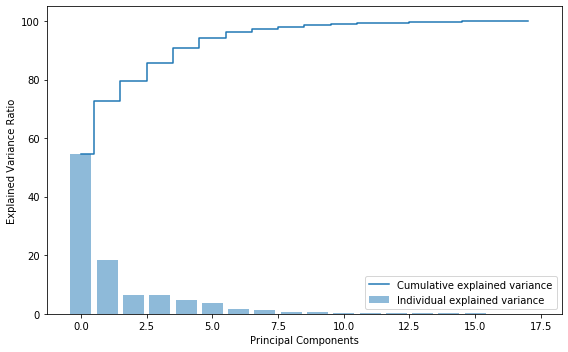

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [31]:
#we use n_components = 7 because we see above that the 95% variance of the data is explained by the 7 eigen vectors
P_reduce = np.array(eigvectors_sort[0:7]).transpose() #Reducing from 18 to 7 dimension space

X_std_7D = np.dot(X_std,P_reduce) #projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D)

In [32]:
#perform train test split
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(Proj_data_df,y,test_size=0.30,random_state=1)

In [33]:
#build an SVM algorithm upon the reduced data
svc = SVC()
params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}

model = GridSearchCV(svc, param_grid=params, verbose=5)

model.fit(pca_X_train, pca_y_train)

print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.848, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.821, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.777, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.479, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.937, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ..................... C=1, kernel=rbf, score=0.888, total=   0.0s
Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [34]:
#create a new SVM model with best hyperparameters on origonal data and Cross Validate it to find the accuracies
newmodel = SVC(C=1, kernel="rbf")

scores = cross_val_score(model, X, y, cv=10)

print("\nAccuracy", scores)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.931, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.942, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.946, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.05, kernel=linear, score=0.943, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.947, total=   0.1s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.9s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.931, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.963, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.938, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.955, total=   0.1s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.926, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.918, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.942, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.934, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.05, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.963, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.508, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.943, total=   0.1s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.938, total=   0.2s
[CV] C=0.5, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.942, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.971, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.942, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.922, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.975, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.943, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.930, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.955, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.931, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.1s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.942, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.05, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.967, total=   0.1s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.939, total=   0.1s
[CV] C=0.5, kernel=linear ............................................
[CV] ................ C=0.5, kernel=linear, score=0.963, total=   0.2s
[CV] C=0.5, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.943, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.955, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................. C=0.01, kernel=rbf, score=0.510, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.967, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.947, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] ............... C=0.05, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................. C=0.05, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.7s finished
